In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [46]:
food = pd.read_csv('./Data/seogyodong+korean-ratio+franchise.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0


### 아파트 데이터 정제하기

In [47]:
apartment = pd.read_csv('./Raw/서울시_우리마을가게_상권분석서비스(구_상권_아파트).csv',encoding='euc-kr')
apartment.head()

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,...,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,기준_분기_코드,상권_코드,상권_코드_명
0,2021,A,골목상권,1,5.0,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,53,148833333,1,1000271,동소문로2길
1,2021,A,골목상권,93,566.0,158.0,3.0,22.0,NaN,17.0,...,364.0,30.0,11.0,12.0,NaN,54,216887087,4,1000147,뚝섬로54길
2,2021,A,골목상권,2,NaN,1.0,3.0,1.0,4.0,NaN,...,NaN,3.0,2.0,NaN,4.0,131,468714286,3,1000007,북촌로5길
3,2021,A,골목상권,5,10.0,7.0,3.0,NaN,6.0,3.0,...,5.0,2.0,NaN,1.0,6.0,118,444225714,3,1000008,북촌로5나길
4,2021,A,골목상권,12,95.0,23.0,2.0,NaN,NaN,34.0,...,44.0,2.0,NaN,NaN,NaN,49,157061533,3,1000010,성균관로5길


In [48]:
apartment['기준_년_코드'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [49]:
food.shape

(1696, 10)

In [50]:
apartment.columns

Index(['기준_년_코드', '상권_구분_코드', '상권_구분_코드_명', '아파트_단지_수',
       '아파트_면적_66_제곱미터_미만_세대_수', '아파트_면적_66_제곱미터_세대_수', '아파트_면적_99_제곱미터_세대_수',
       '아파트_면적_132_제곱미터_세대_수', '아파트_면적_165_제곱미터_세대_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '아파트_평균_면적',
       '아파트_평균_시가', '기준_분기_코드', '상권_코드', '상권_코드_명'],
      dtype='object')

In [51]:
# 사용가능한 컬럼만 뽑기
apartment=apartment[['기준_년_코드', '기준_분기_코드','상권_코드', '상권_코드_명','아파트_단지_수','아파트_평균_면적','아파트_평균_시가']]

In [52]:
# 데이터 합치기
food=pd.merge(food,apartment,on=['기준_년_코드', '기준_분기_코드','상권_코드', '상권_코드_명'],how='left')

In [53]:
food.isnull().any()

기준_년_코드        False
기준_분기_코드       False
상권_코드          False
상권_코드_명        False
서비스_업종_코드      False
서비스_업종_코드_명    False
분기당_매출_금액      False
점포수            False
한식음식점여부        False
프랜차이즈          False
아파트_단지_수        True
아파트_평균_면적       True
아파트_평균_시가       True
dtype: bool

In [54]:
# nan 개수
food.isnull().sum()

기준_년_코드         0
기준_분기_코드        0
상권_코드           0
상권_코드_명         0
서비스_업종_코드       0
서비스_업종_코드_명     0
분기당_매출_금액       0
점포수             0
한식음식점여부         0
프랜차이즈           0
아파트_단지_수       53
아파트_평균_면적      53
아파트_평균_시가      53
dtype: int64

In [55]:
# 단지수 , 평균 면적 , 평균 시가 빠진데가 공통이다.
len(food[food['아파트_단지_수'].isnull()])

53

In [56]:
food_not_null=food[~food['아파트_단지_수'].isnull()]

In [57]:
# 상권 업종별로 데이터 몇개씩 줄었는지
food_count=food_not_null.pivot_table(index=['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'],aggfunc='size')
food_count

# 그냥 2014 1분기 데이터만 빠진 거 같다.
# 그럼 그냥 데이터를 빼자

상권_코드    상권_코드_명   서비스_업종_코드  서비스_업종_코드_명
1000466  동교로17길    CS100001   한식음식점          31
                   CS100002   중식음식점          31
                   CS100003   일식음식점          31
                   CS100006   패스트푸드점         31
                   CS100008   분식전문점          31
                   CS100010   커피-음료          31
1000467  동교로19길    CS100001   한식음식점          31
                   CS100003   일식음식점          31
                   CS100004   양식음식점          31
                   CS100006   패스트푸드점         31
                   CS100007   치킨전문점          31
                   CS100008   분식전문점          31
                   CS100009   호프-간이주점        31
                   CS100010   커피-음료          31
1000488  신촌로12길    CS100001   한식음식점          31
                   CS100002   중식음식점          31
                   CS100004   양식음식점          31
                   CS100005   제과점            31
                   CS100006   패스트푸드점         31
                   CS100008   분식전문점          3

In [58]:
food = food_not_null

---
### Feature 파악하기

In [59]:
# 년 분기 상권 코드 합쳐서 분포 어떻게 변화 하는지좀 보자
food_count=food.pivot_table(index=['기준_년_코드','기준_분기_코드','상권_코드_명'],
                 values=['분기당_매출_금액','아파트_단지_수','아파트_평균_면적','아파트_평균_시가'],
                 aggfunc=np.mean
                 )

In [60]:
food_count = food_count.reset_index()
food_count

,기준_년_코드,기준_분기_코드,상권_코드_명,분기당_매출_금액,아파트_단지_수,아파트_평균_면적,아파트_평균_시가
0,2014,2,동교로17길,1.283952e+08,53.0,51.0,116528667.0
1,2014,2,동교로19길,3.554716e+08,31.0,55.0,126605034.0
2,2014,2,신촌로12길,5.518612e+08,15.0,53.0,103877011.0
3,2014,2,양화로11길,2.451899e+08,28.0,61.0,143443321.0
4,2014,2,와우산로29가길,6.392540e+08,10.0,48.0,104584802.0
...,...,...,...,...,...,...,...
274,2021,4,와우산로29가길,2.950771e+08,8.0,46.0,155397222.0
275,2021,4,와우산로29길,3.016944e+08,16.0,55.0,190646420.0
276,2021,4,월드컵로10길,5.530790e+08,60.0,49.0,202335523.0
277,2021,4,월드컵로16길,6.303989e+08,80.0,52.0,188404512.0


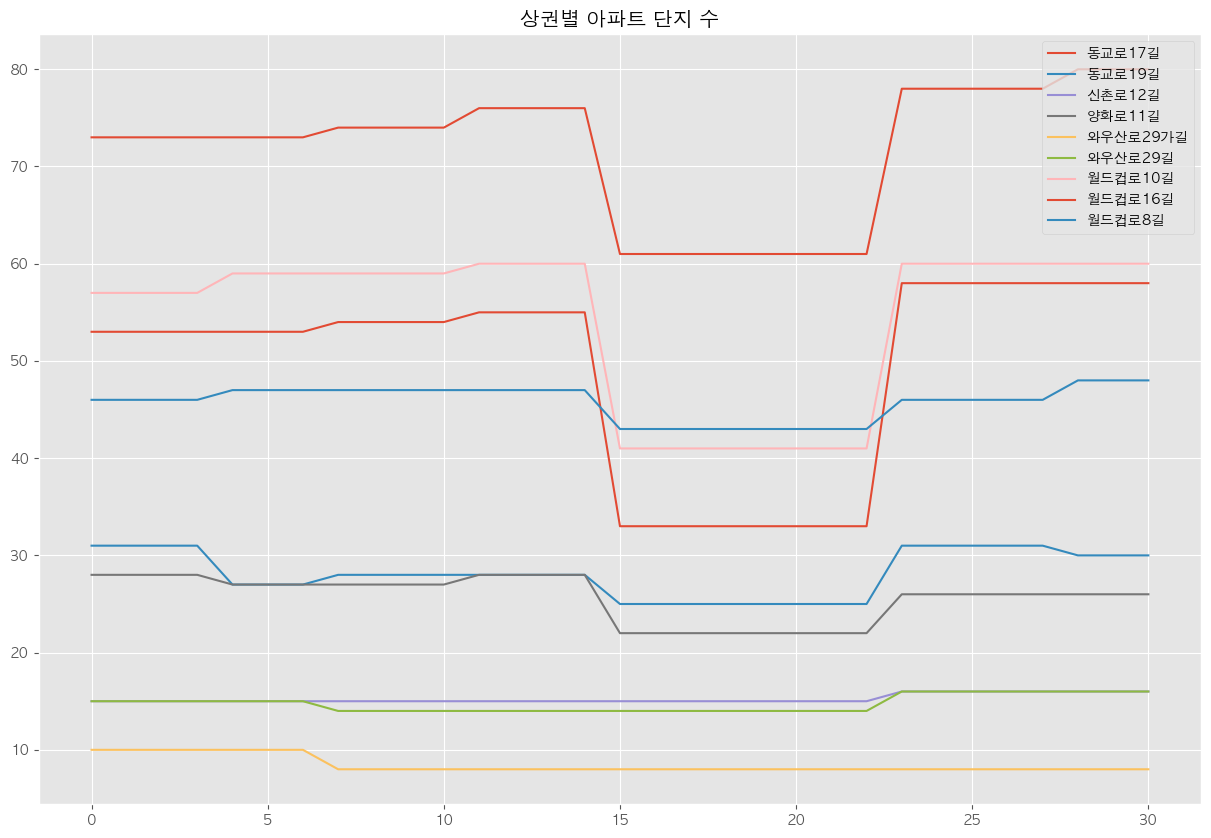

In [61]:
# 상권별로 아파트 단지 수의 차이
plt.style.use('ggplot')

plt.figure(figsize=(15,10))

for sang in food_count['상권_코드_명'].unique():
    test = food_count[food_count['상권_코드_명'] == sang]
    test.reset_index(inplace=True,drop=True)
    plt.plot(
        test['아파트_단지_수'],
        label=sang
    )

plt.legend(loc='upper right')
plt.title('상권별 아파트 단지 수')

plt.show()

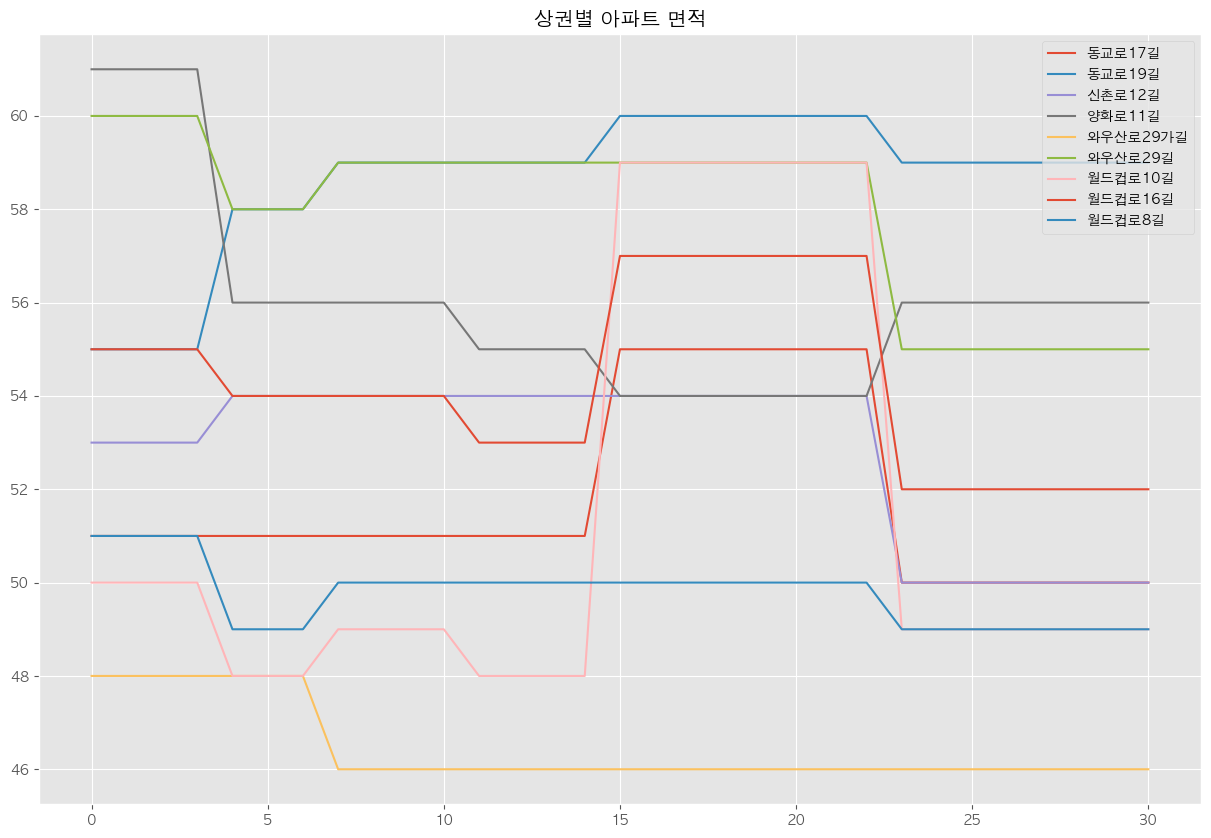

In [62]:
# 상권별로 아파트 평균 면적 차이
plt.style.use('ggplot')

plt.figure(figsize=(15,10))

for sang in food_count['상권_코드_명'].unique():
    test = food_count[food_count['상권_코드_명'] == sang]
    test.reset_index(inplace=True,drop=True)
    plt.plot(
        test['아파트_평균_면적'],
        label=sang
    )

plt.legend(loc='upper right')
plt.title('상권별 아파트 면적')

plt.show()

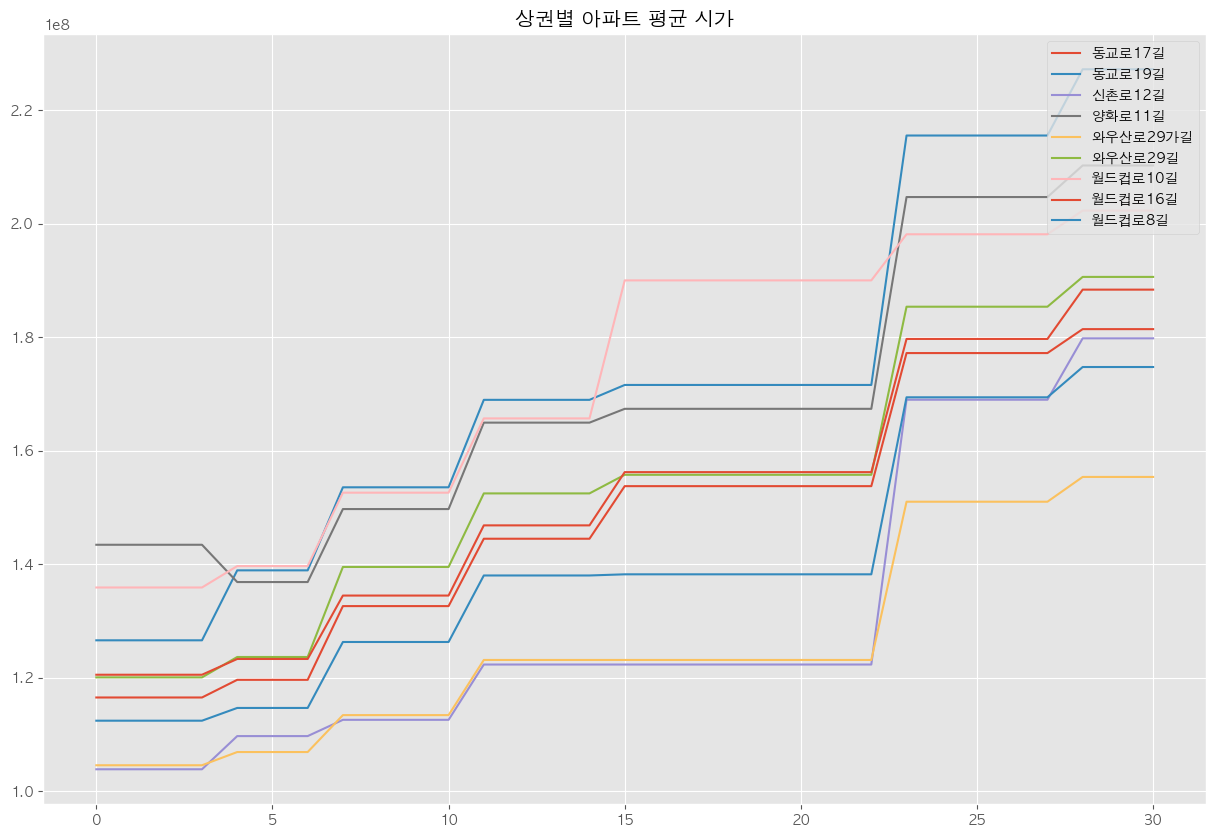

In [63]:
# 상권별로 아파트 평군 시가 차이
plt.style.use('ggplot')

plt.figure(figsize=(15,10))

for sang in food_count['상권_코드_명'].unique():
    test = food_count[food_count['상권_코드_명'] == sang]
    test.reset_index(inplace=True,drop=True)
    plt.plot(
        test['아파트_평균_시가'],
        label=sang
    )

plt.legend(loc='upper right')
plt.title('상권별 아파트 평균 시가')

plt.show()

### 세 피쳐 모두 상권별로 분포가 매우 다르다.
### 상권별특징을 어쩌면 나타낼 수도 있지 않을까??

### 아파트 데이터의 상관관계 찍어보기
- 너무 관련있으면 다중공선성의 위험이 있기 때문에

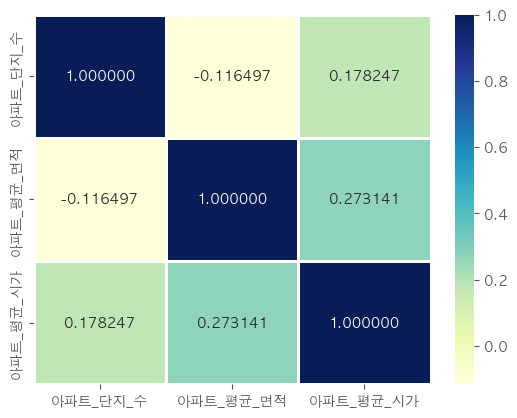

In [64]:
table=food_count[['아파트_단지_수','아파트_평균_면적','아파트_평균_시가']].corr()

sns.heatmap(
	table,
	annot=True,
	fmt='f',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

plt.show()

### 그리 높지 않은 것 같다. 그러므로 다중공선성의 위험은 없는거 같으니 모두 feature로서 판단되면 독립적으로 사용해도 되지 않을까라는 생각

In [65]:
food.head(1)

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,아파트_단지_수,아파트_평균_면적,아파트_평균_시가
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,58.0,50.0,177225974.0


### 아파트 단지 수 feature 판단하기

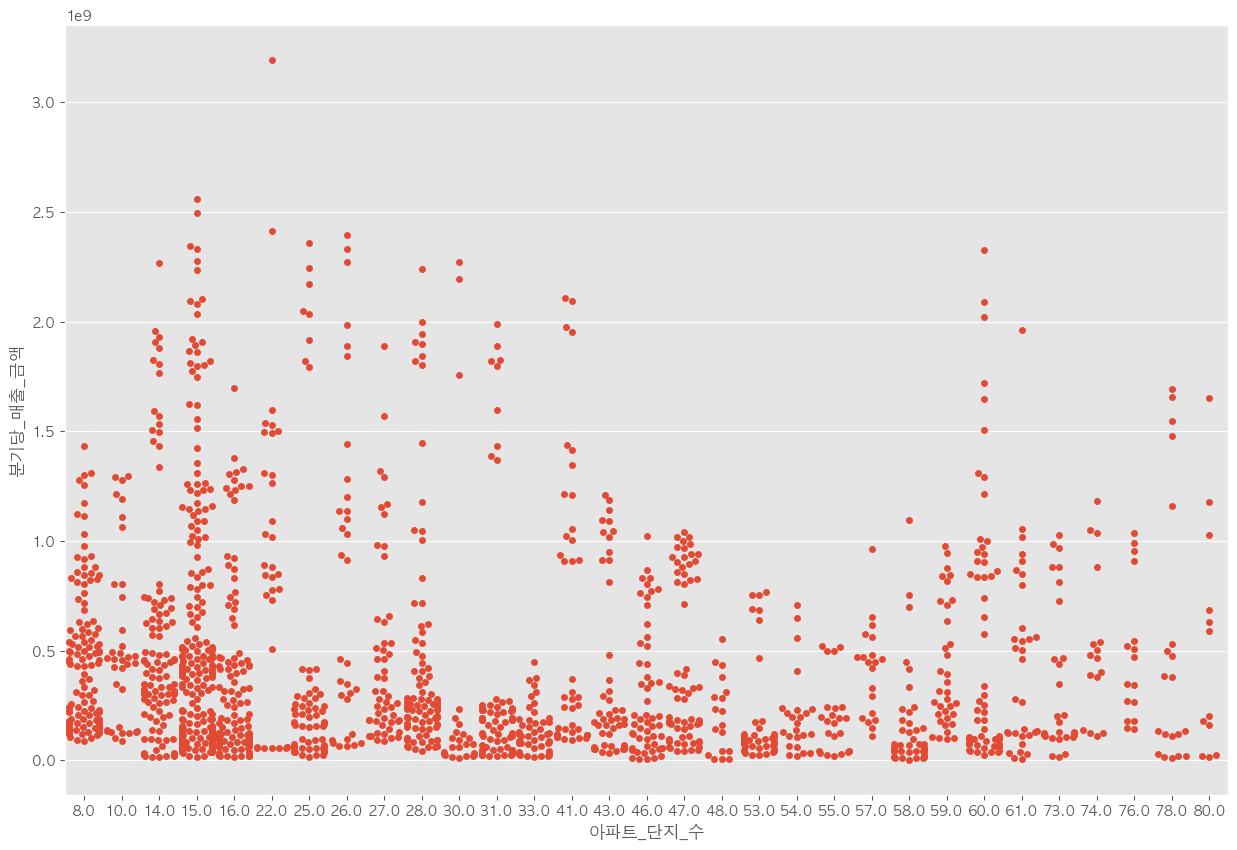

In [66]:
plt.figure(figsize=(15,10))

sns.swarmplot(
    y='분기당_매출_금액',
    x='아파트_단지_수',
    data=food,
    # fit_reg=False, # 회귀선 안나오게
    # scatter_kws={'s':50}, # 좌표상의 점의 크기
    # legend=False
)

plt.show()

### 비슷한 거 끼리 묶어보기
- 8 , 15 , 16 , 28
- 10 , 41 , 43 , 54 , 55 , 61 , 73, 78 , 80
- 53 , 58 , 60

#### 데이터 입력시 입력 범위를 벗어나는 데이터가 들어올 수도 있는데, 비슷한 거끼리의 관계가 일정 범위를 가지지 않고 무작위이기 때문에 feature로서는 사용 불가능할 것이라고 생각이 든다. 

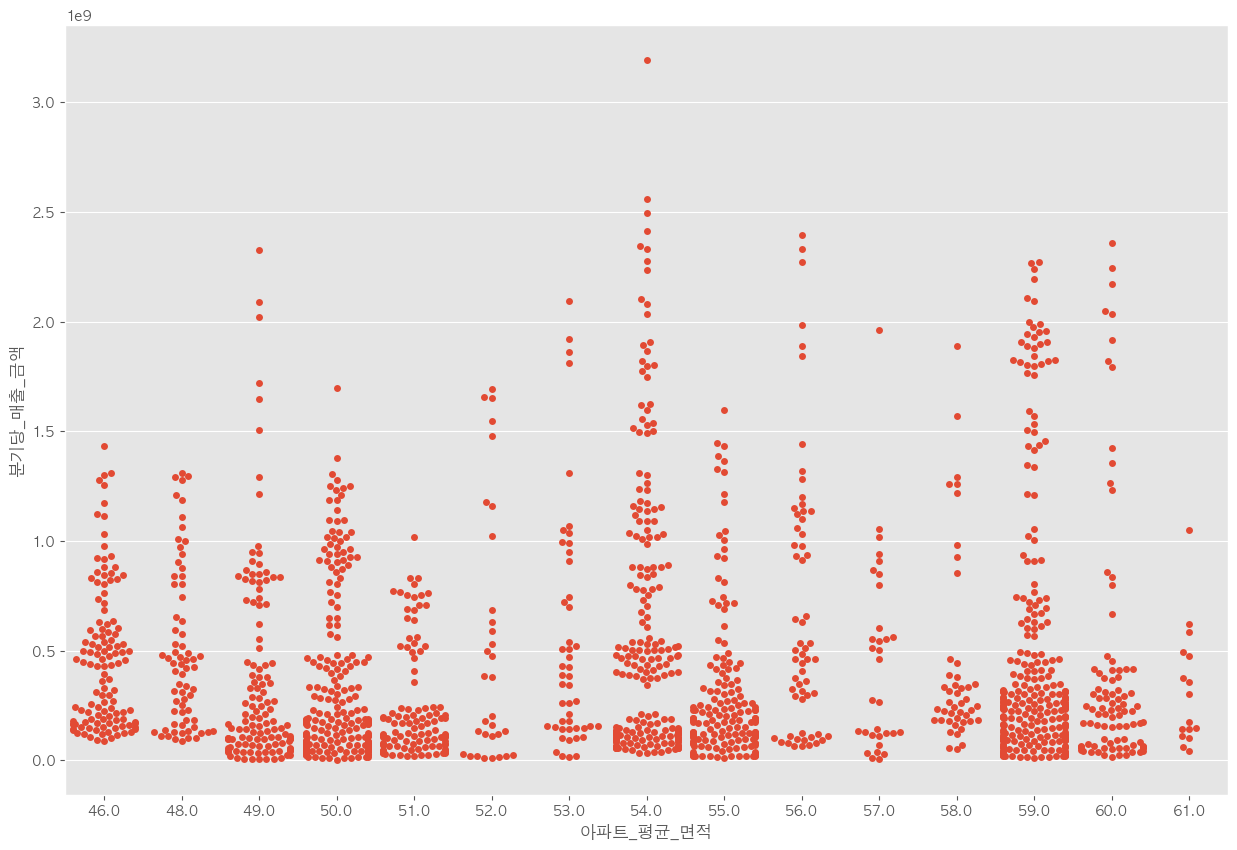

In [67]:
plt.figure(figsize=(15,10))

sns.swarmplot(
    y='분기당_매출_금액',
    x='아파트_평균_면적',
    data=food,
    # fit_reg=False, # 회귀선 안나오게
    # scatter_kws={'s':50}, # 좌표상의 점의 크기
    # legend=False
)

plt.show()

In [68]:
# 단지수 feature 추가
food['아파트평균면적']=[
    0 if i <= 48 else 1
    for i in food['아파트_평균_면적']
]

### 단지수보다는 면적이 48 이하 48 초과로 나눌시에 특징이 나오는 것 같다.

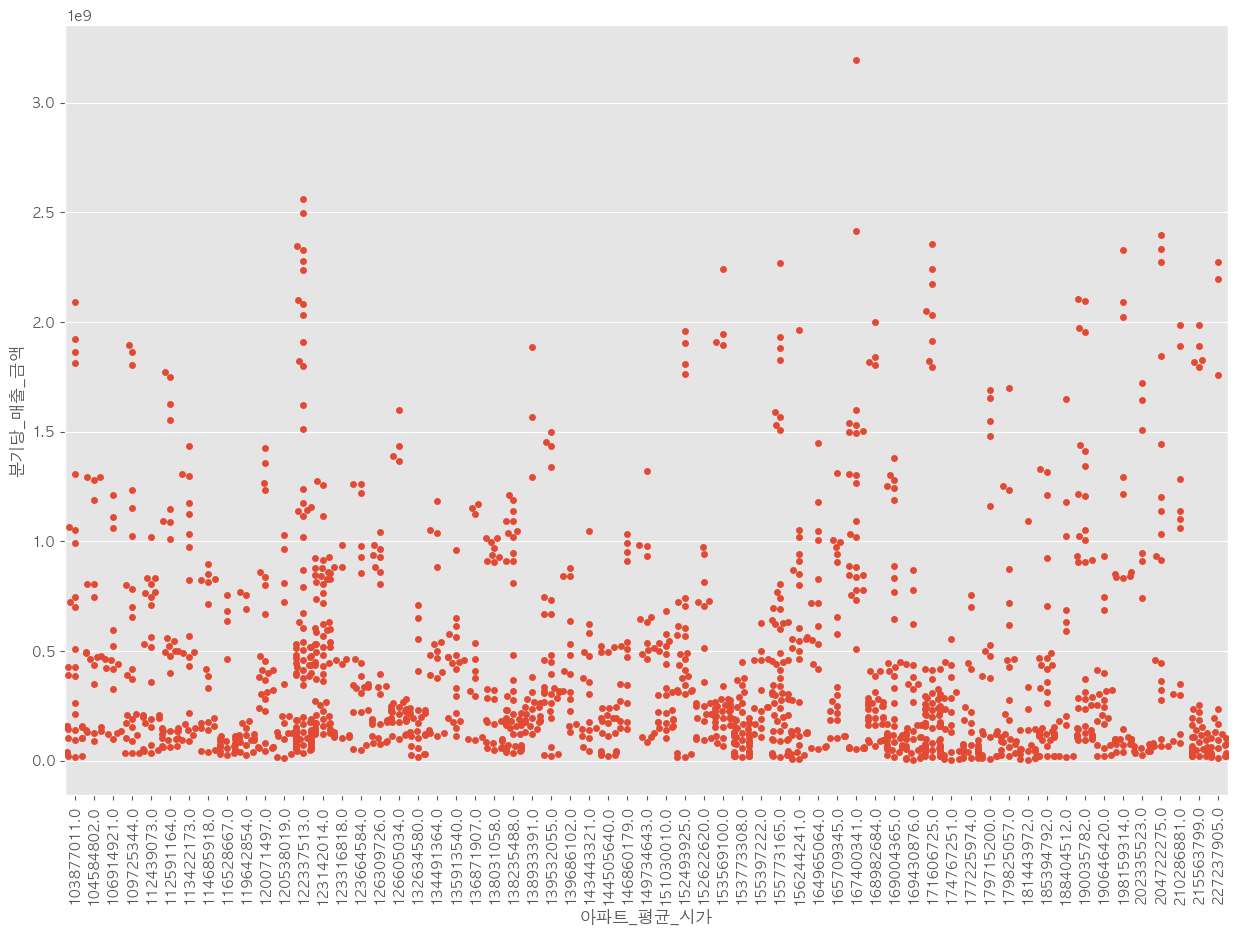

In [69]:

plt.figure(figsize=(15,10))

sns.swarmplot(
    y='분기당_매출_금액',
    x='아파트_평균_시가',
    data=food,
    # fit_reg=False, # 회귀선 안나오게
    # scatter_kws={'s':50}, # 좌표상의 점의 크기
    # legend=False
)

plt.xticks(
    rotation=90
)

plt.show()

### 딱히 안보인다.

### clustering을 통해 구분이 되는지 안되는지 파악해보도록 하자.

### 안타깝게도 안된다. 근데 80% 까지 올리는 방법은 알았다.

In [70]:
food.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '점포수', '한식음식점여부', '프랜차이즈', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '아파트평균면적'],
      dtype='object')

In [71]:
# target=food.pivot_table(index=['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명'],values=['분기당_매출_금액'],aggfunc=np.sum)

# feature=food.pivot_table(index=['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명'],values=['아파트_단지_수', '아파트_평균_면적',
#        '아파트_평균_시가'],aggfunc=np.mean)

# food_sub=pd.concat([target,feature],axis=1)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

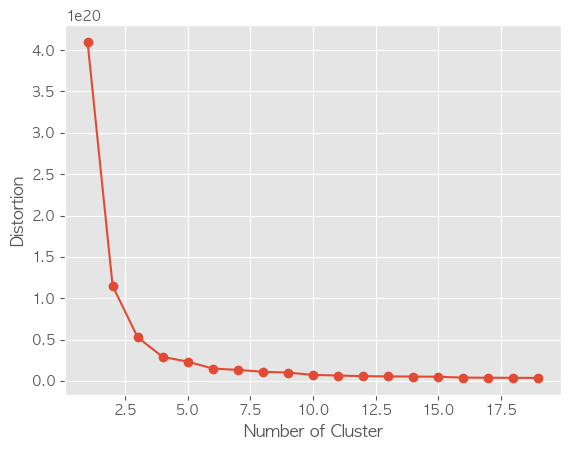

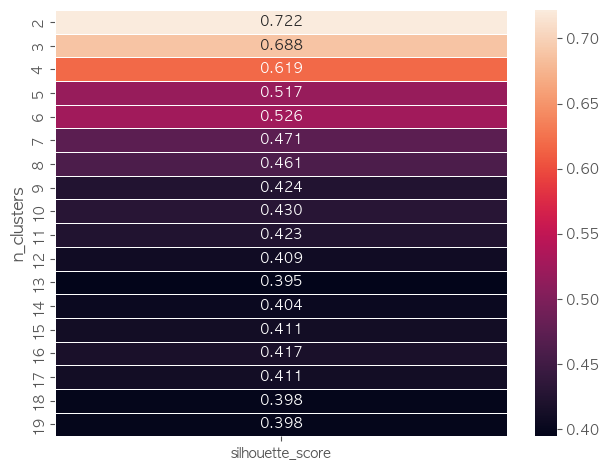

In [73]:
import module.clustering as clu
data = food[['아파트_단지_수','아파트_평균_면적','아파트_평균_시가','분기당_매출_금액']]



clu.visualize_elbowmethod(data,n=20)
clu.visualize_silhouette_layer(data,n=20)

In [74]:
# kmeans 한 거 추가
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
food['clustering']=kmeans.labels_

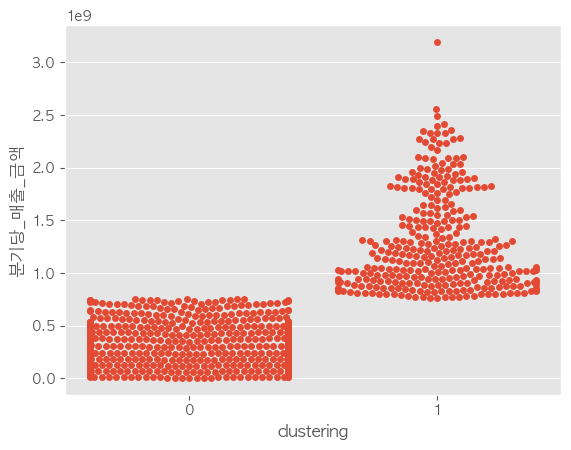

In [75]:
sns.swarmplot(
    x='clustering',
    y='분기당_매출_금액',
    data=food
)

plt.show()

In [76]:
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,프랜차이즈,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,아파트평균면적,clustering
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,1,58.0,50.0,177225974.0,1,0
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0,58.0,50.0,177225974.0,1,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0,58.0,50.0,177225974.0,1,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0,58.0,50.0,177225974.0,1,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,0,58.0,50.0,177225974.0,1,0


In [77]:
feature = food[['점포수','한식음식점여부','프랜차이즈','clustering']]
target = food['분기당_매출_금액']

In [78]:
from module.default import basic
basic(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8368317073714143
test :  0.7823964514435192
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8247608638118455
test :  0.8199833032377448
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.8247419663122081
test :  0.8200025303240267
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8247608638118453
test :  0.8199833033068418
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.8777772312838221
test :  0.8149737176880976
--------------------------------------------------


In [79]:
from module.machinelearning import ridge , lasso

food['점포수_스케일']=scaler.fit_transform(food['점포수'].to_numpy().reshape(-1,1))

feature = food[['점포수_스케일','한식음식점여부','프랜차이즈','clustering']]
target = food['분기당_매출_금액']

basic(feature,target)
ridge(feature,target)
lasso(feature,target)


<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8434299442875766
test :  0.8000228315921459
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8170426537186313
test :  0.8124411547065561
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.8170241509404917
test :  0.8124899325403041
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.817042653718631
test :  0.8124411548479623
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.8669304875008482
test :  0.8090966358609164
--------------------------------------------------
-------------------------------------------------- alpha :  0.0001 --------------------------------------------------
train : 0.8150146921549803
val : 0.8107258568002068
test : 0.8330787622405876

--

### 분기당 매출금액 까지 클러스터링 할 때 넣었는데 나중에 입력 받을 때 아파트 데이터를 받아서 clustering label을 만드는 모델을 하나 만들어야 될듯

In [80]:
del food['아파트_단지_수']
del food['아파트_평균_면적']
del food['아파트_평균_시가']
del food['아파트평균면적']
del food['점포수_스케일']

In [81]:
food.to_csv('./Data/seogyodong+korean-ratio+franchise+hint.csv',index=False)